In [1]:
import pandas as pd 
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [4]:
test

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2010-11-20,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN
9996,2009-06-03,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN
9997,2010-04-20,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN
9998,2010-02-17,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN


In [5]:
train["target"].value_counts()/len(train)     # so the probablity is almost imbalanced

target
no     0.851394
yes    0.148606
Name: count, dtype: float64

In [6]:
train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [7]:
test.isnull().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [9]:
train.duplicated().sum()
test.duplicated().sum()

0

In [10]:
train = train.drop(columns = "poutcome")
test = test.drop(columns = "poutcome")
train.head()
test.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2


In [11]:
train['last contact date'] = pd.to_datetime(train['last contact date'])
train['year'] = train['last contact date'].dt.year
train['month'] = train['last contact date'].dt.month
train['day'] = train['last contact date'].dt.day
train['weekday'] = train['last contact date'].dt.weekday 
train = train.drop(columns = "last contact date")

In [12]:
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['year'] = test['last contact date'].dt.year
test['month'] = test['last contact date'].dt.month
test['day'] = test['last contact date'].dt.day
test['weekday'] = test['last contact date'].dt.weekday 
test = test.drop(columns = "last contact date")

In [13]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,target,year,month,day,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,no,2009,4,17,4
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,no,2009,10,11,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,no,2010,11,20,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,no,2009,9,1,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,no,2008,1,29,1


In [14]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,year,month,day,weekday
0,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,2009,11,21,5
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,2010,2,4,3
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,2010,7,28,2
3,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,2010,6,9,2
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,2008,3,2,6


In [15]:
train.isnull().sum()

age              0
job            229
marital          0
education     1467
default          0
balance          0
housing          0
loan             0
contact      10336
duration         0
campaign         0
pdays            0
previous         0
target           0
year             0
month            0
day              0
weekday          0
dtype: int64

In [16]:
test.isnull().sum()

age             0
job            59
marital         0
education     390
default         0
balance         0
housing         0
loan            0
contact      2684
duration        0
campaign        0
pdays           0
previous        0
year            0
month           0
day             0
weekday         0
dtype: int64

In [17]:
train["job"] = train["job"].bfill()
train["education"] = train["education"].bfill()
train["contact"] = train["contact"].bfill()

In [18]:
test["job"] = test["job"].bfill()
test["education"] = test["education"].bfill()
test["contact"] = test["contact"].bfill()
test["contact"] = test["contact"].fillna("cellular")

In [29]:
train["balance"].min()

-8019

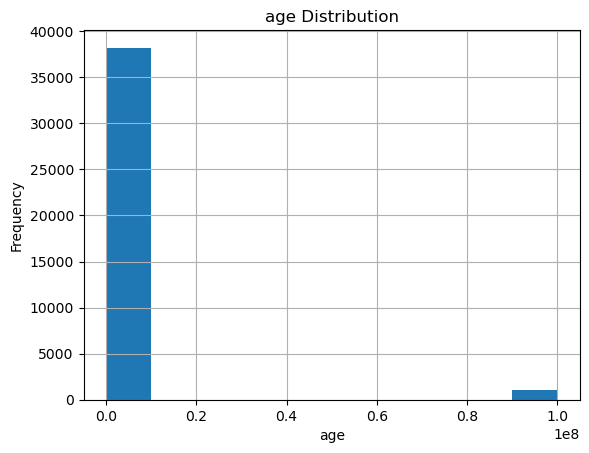

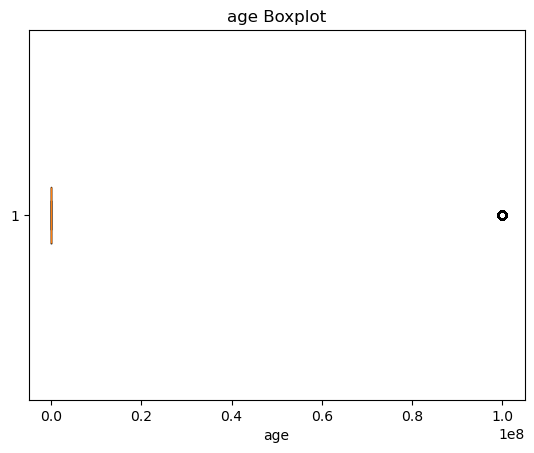

In [47]:
train['age'].hist(bins = 10)
plt.title("age Distribution")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(train['age'], vert=False)
plt.title("age Boxplot")
plt.xlabel("age")
plt.show()

In [57]:
Q1 = train["age"].quantile(0.25)
Q3 = train["age"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

outliers = train[(train["age"] < lbound) | (train["age"] > ubound)]["age"]

def val(i):
    if i < lbound:
        return -9999
    elif i > ubound:
        return 100000000
    return i  # Keep the value as is if it's between the bounds

train["age"] = train["age"].apply(val)


print("The Percent of the outlier in columns:",(len(outliers)/len(train["age"]))*100)

train["age"].max()

Q1: 33.0, Q3: 50.0, IQR: 17.0
Lower Bound: 7.5, Upper Bound: 75.5
The Percent of the outlier in columns: 2.5554053709418274


100000000

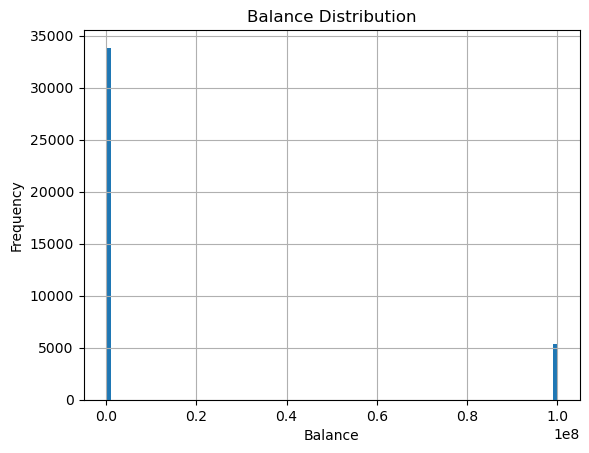

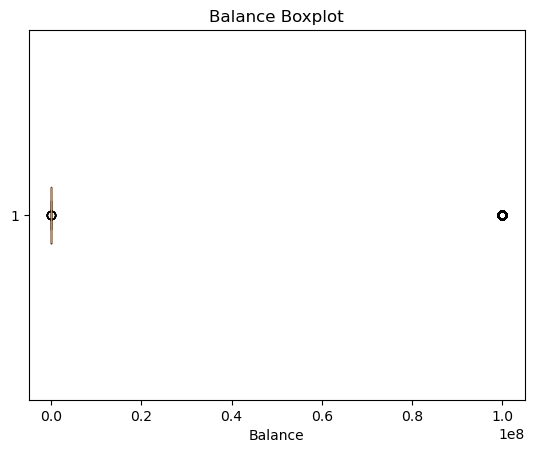

In [55]:
train['balance'].hist(bins=100)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(train['balance'], vert=False)
plt.title("Balance Boxplot")
plt.xlabel("Balance")
plt.show()

In [52]:
Q1 = train["balance"].quantile(0.25)
Q3 = train["balance"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

outliers = train[(train["balance"] < lbound) | (train["balance"] > ubound)]["balance"]

def val(i):
    if i < lbound:
        return -9999
    elif i > ubound:
        return 100000000
    return i  # Keep the value as is if it's between the bounds

train["balance"] = train["balance"].apply(val)


print("The Percent of the outlier in columns:",(len(outliers)/len(train["balance"]))*100)

train["balance"].min()

Q1: 98.0, Q3: 2030.0, IQR: 1932.0
Lower Bound: -2800.0, Upper Bound: 4928.0
The Percent of the outlier in columns: 13.705337787865652


-9999

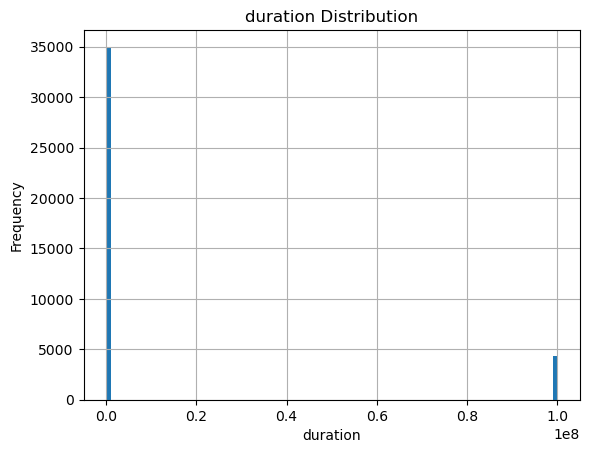

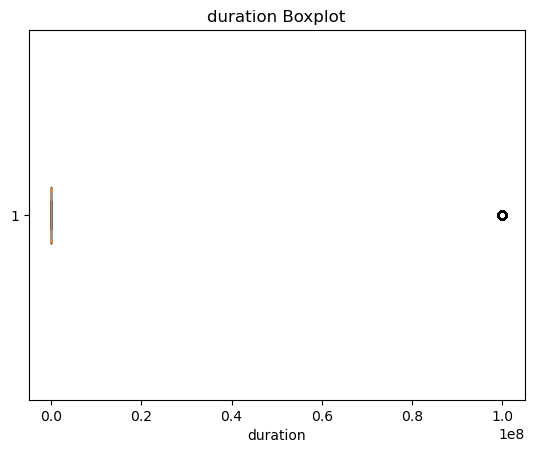

In [62]:
train['duration'].hist(bins=100)
plt.title("duration Distribution")
plt.xlabel("duration")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(train['duration'], vert=False)
plt.title("duration Boxplot")
plt.xlabel("duration")
plt.show()

In [61]:
Q1 = train["duration"].quantile(0.25)
Q3 = train["duration"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

outliers = train[(train["duration"] < lbound) | (train["duration"] > ubound)]["duration"]

def val(i):
    if i < lbound:
        return -9999
    elif i > ubound:
        return 100000000
    return i  # Keep the value as is if it's between the bounds

train["duration"] = train["duration"].apply(val)


print("The Percent of the outlier in columns:",(len(outliers)/len(train["duration"]))*100)

train["duration"].min()

Q1: 109.0, Q3: 380.0, IQR: 271.0
Lower Bound: -297.5, Upper Bound: 786.5
The Percent of the outlier in columns: 10.981612302670168


0

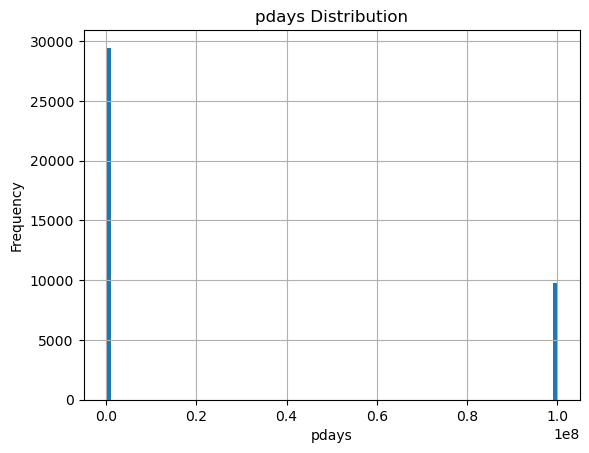

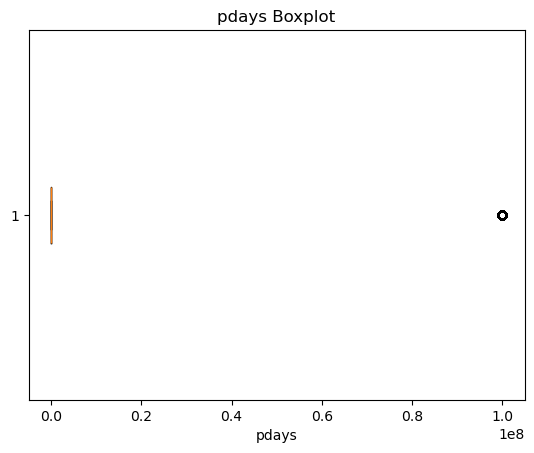

In [64]:
train['pdays'].hist(bins=100)
plt.title("pdays Distribution")
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(train['pdays'], vert=False)
plt.title("pdays Boxplot")
plt.xlabel("pdays")
plt.show()

In [65]:
Q1 = train["pdays"].quantile(0.25)
Q3 = train["pdays"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

outliers = train[(train["pdays"] < lbound) | (train["pdays"] > ubound)]["pdays"]

def val(i):
    if i < lbound:
        return -9999
    elif i > ubound:
        return 100000000
    return i  # Keep the value as is if it's between the bounds

train["pdays"] = train["pdays"].apply(val)


print("The Percent of the outlier in columns:",(len(outliers)/len(train["pdays"]))*100)

train["pdays"].max()

Q1: -1.0, Q3: -1.0, IQR: 0.0
Lower Bound: -1.0, Upper Bound: -1.0
The Percent of the outlier in columns: 24.903725995256433


100000000

Q1: 33.0, Q3: 50.0, IQR: 17.0
Lower Bound: 7.5, Upper Bound: 75.5
Q1: 92.0, Q3: 2051.0, IQR: 1959.0
Lower Bound: -2846.5, Upper Bound: 4989.5
Q1: 108.0, Q3: 380.0, IQR: 272.0
Lower Bound: -300.0, Upper Bound: 788.0
Q1: 1.0, Q3: 4.0, IQR: 3.0
Lower Bound: -3.5, Upper Bound: 8.5
Q1: -1.0, Q3: -1.0, IQR: 0.0
Lower Bound: -1.0, Upper Bound: -1.0


<Axes: ylabel='age'>

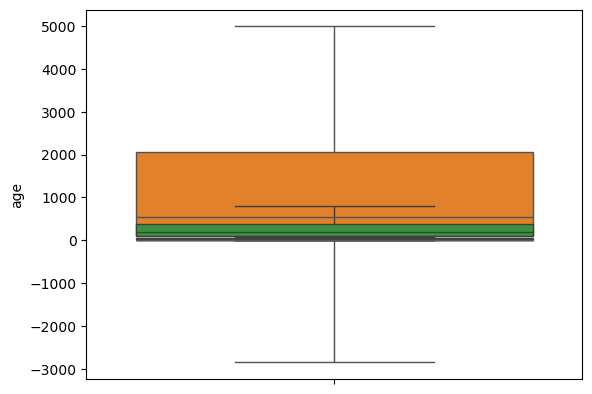

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers(column):
    Q1 = test[column].quantile(0.25)
    Q3 = test[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

    test[column] = np.where(test[column] > ubound, ubound,
                          np.where(test[column] < lbound, lbound, test[column]))

handle_outliers("age")
sns.boxplot(test["age"])

handle_outliers("balance")
sns.boxplot(test["balance"])

handle_outliers("duration")
sns.boxplot(test["duration"])

handle_outliers("campaign")
sns.boxplot(test["campaign"])

handle_outliers("pdays")
sns.boxplot(test["pdays"])

In [21]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,target,year,month,day,weekday
0,26.0,blue-collar,married,secondary,no,647.0,yes,no,cellular,357.0,2.0,-1.0,1,no,2009,4,17,4
1,52.0,technician,married,secondary,no,553.0,yes,no,telephone,160.0,1.0,-1.0,0,no,2009,10,11,6
2,44.0,blue-collar,married,secondary,no,1397.0,no,no,cellular,326.0,1.0,-1.0,0,no,2010,11,20,5
3,33.0,admin.,married,secondary,no,394.0,yes,no,telephone,104.0,3.0,-1.0,0,no,2009,9,1,1
4,31.0,entrepreneur,single,tertiary,no,137.0,no,no,cellular,445.0,2.0,-1.0,0,no,2008,1,29,1


In [22]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for column in train.columns:
    if train.dtypes[column] == 'object': 
        train[column] = le.fit_transform(train[column]) 
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,target,year,month,day,weekday
0,26.0,1,1,1,0,647.0,1,0,0,357.0,2.0,-1.0,1,0,2009,4,17,4
1,52.0,9,1,1,0,553.0,1,0,1,160.0,1.0,-1.0,0,0,2009,10,11,6
2,44.0,1,1,1,0,1397.0,0,0,0,326.0,1.0,-1.0,0,0,2010,11,20,5
3,33.0,0,1,1,0,394.0,1,0,1,104.0,3.0,-1.0,0,0,2009,9,1,1
4,31.0,2,2,2,0,137.0,0,0,0,445.0,2.0,-1.0,0,0,2008,1,29,1


In [23]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for column in test.columns:
    if test.dtypes[column] == 'object': 
        test[column] = le.fit_transform(test[column]) 
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,year,month,day,weekday
0,36.0,4,2,2,0,7.0,0,0,0,20.0,1.0,-1.0,0,2009,11,21,5
1,30.0,10,1,2,0,1067.0,0,0,0,78.0,2.0,-1.0,0,2010,2,4,3
2,32.0,1,2,1,0,82.0,1,0,0,86.0,4.0,-1.0,0,2010,7,28,2
3,38.0,0,1,0,0,1487.0,0,0,0,332.0,2.0,-1.0,0,2010,6,9,2
4,59.0,4,1,2,0,315.0,0,0,0,591.0,1.0,-1.0,2,2008,3,2,6


In [24]:
ytrain = train['target']
xtrain = train.drop(columns=['target'])

In [25]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
39206    0
39207    0
39208    0
39209    0
39210    1
Name: target, Length: 39211, dtype: int32

In [26]:
xtrain

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,year,month,day,weekday
0,26.0,1,1,1,0,647.0,1,0,0,357.0,2.0,-1.0,1,2009,4,17,4
1,52.0,9,1,1,0,553.0,1,0,1,160.0,1.0,-1.0,0,2009,10,11,6
2,44.0,1,1,1,0,1397.0,0,0,0,326.0,1.0,-1.0,0,2010,11,20,5
3,33.0,0,1,1,0,394.0,1,0,1,104.0,3.0,-1.0,0,2009,9,1,1
4,31.0,2,2,2,0,137.0,0,0,0,445.0,2.0,-1.0,0,2008,1,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31.0,9,2,1,0,0.0,1,0,0,16.0,8.5,-1.0,0,2008,7,31,3
39207,59.0,0,1,0,0,4928.0,0,0,0,114.0,4.0,-1.0,0,2009,7,31,4
39208,36.0,1,1,1,0,63.0,1,0,0,56.0,8.0,-1.0,0,2008,6,2,0
39209,28.0,8,2,1,0,4928.0,0,0,0,93.0,5.0,-1.0,0,2010,3,20,5


In [32]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(xtrain)
X_scaled = pd.DataFrame(data=X_scaled, columns=xtrain.columns)

model = RandomForestClassifier(class_weight="balanced",)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, ytrain, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9993
           1       0.55      0.28      0.37      1771

    accuracy                           0.86     11764
   macro avg       0.72      0.62      0.64     11764
weighted avg       0.83      0.86      0.84     11764



In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

# Output the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8575314518871132
Precision: 0.832702108127243
Recall: 0.8575314518871132
F1-Score: 0.8366624389512147
Confusion Matrix:
 [[9600  393]
 [1283  488]]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)
X_scaled = pd.DataFrame(data=X_scaled, columns=test.columns)
result = model.predict(X_scaled)
result

array([0, 0, 0, ..., 0, 0, 0])